In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df_raw = pd.read_csv('Titanic.csv')
df_raw.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [22]:
df_raw.shape

(891, 8)

In [23]:
#Removing Outliers 

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls


index_list = []

index_list.extend(outliers(df_raw,'Fare'))

index_list


[1,
 27,
 31,
 34,
 52,
 61,
 62,
 72,
 88,
 102,
 118,
 120,
 124,
 139,
 151,
 159,
 180,
 195,
 201,
 215,
 218,
 224,
 230,
 245,
 256,
 257,
 258,
 262,
 268,
 269,
 275,
 290,
 291,
 297,
 299,
 305,
 306,
 307,
 310,
 311,
 318,
 319,
 324,
 325,
 332,
 334,
 336,
 337,
 341,
 366,
 369,
 373,
 375,
 377,
 380,
 385,
 390,
 393,
 412,
 435,
 438,
 445,
 453,
 484,
 486,
 496,
 498,
 504,
 505,
 520,
 527,
 537,
 540,
 544,
 550,
 557,
 558,
 581,
 585,
 587,
 591,
 609,
 627,
 641,
 645,
 655,
 659,
 660,
 665,
 679,
 681,
 689,
 698,
 700,
 708,
 716,
 730,
 737,
 741,
 742,
 745,
 759,
 763,
 765,
 779,
 789,
 792,
 802,
 820,
 829,
 835,
 846,
 849,
 856,
 863,
 879]

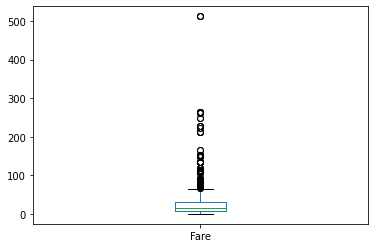

In [24]:
# Define a function called Plot_Boxplot

def Plot_Boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

Plot_Boxplot(df_raw, 'Fare')

In [25]:
# Define remove function to return the cleaned dataframe

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)

    return df

df_cleaned = remove(df_raw,index_list)

df_cleaned.shape



(775, 8)

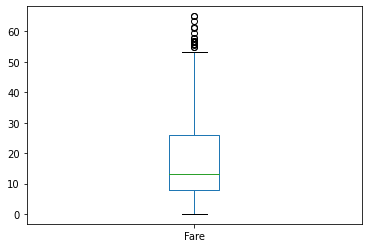

In [26]:
Plot_Boxplot(df_cleaned, 'Fare')

In [27]:
df_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
5,6,0,3,male,NaN,0,0,8.4583
